# 📚 1. Importing the libraries

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
# Required imports for models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB




# 📊 2. Load and Inspect the Data

In [91]:
df = pd.read_csv('/content/breast-cancer (1).csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [93]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [94]:
from pprint import pprint
pprint(df.shape)
print("num of features:",df.shape[1])
pprint(df.columns)


(569, 32)
num of features: 32
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [95]:
numerical_features = df.select_dtypes(include=["int", "float"]).columns
categorical_features = df.select_dtypes(include=['object']).columns
print(f'num_features: { numerical_features}\n')
print(f'cat_features: {categorical_features}')


num_features: Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

cat_features: Index(['diagnosis'], dtype='object')


In [96]:
print(df.isnull().sum())    # Missing values


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# 📈 4. Exploratory Data Analysis (EDA)


/tmp/ipython-input-1728686613.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette=['blue', 'red'])


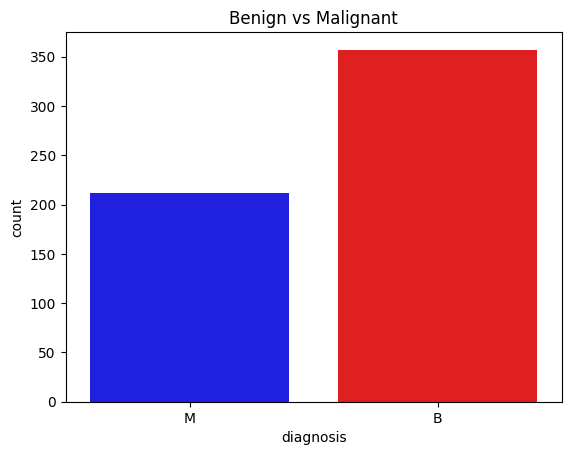

diagnosis
B    357
M    212
Name: count, dtype: int64


In [97]:
sns.countplot(x='diagnosis', data=df, palette=['blue', 'red'])
plt.title('Benign vs Malignant')
plt.show()
print(df['diagnosis'].value_counts())

In [98]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})


/tmp/ipython-input-2774128319.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=corr_df, x='correlation', y='feature', palette='coolwarm')


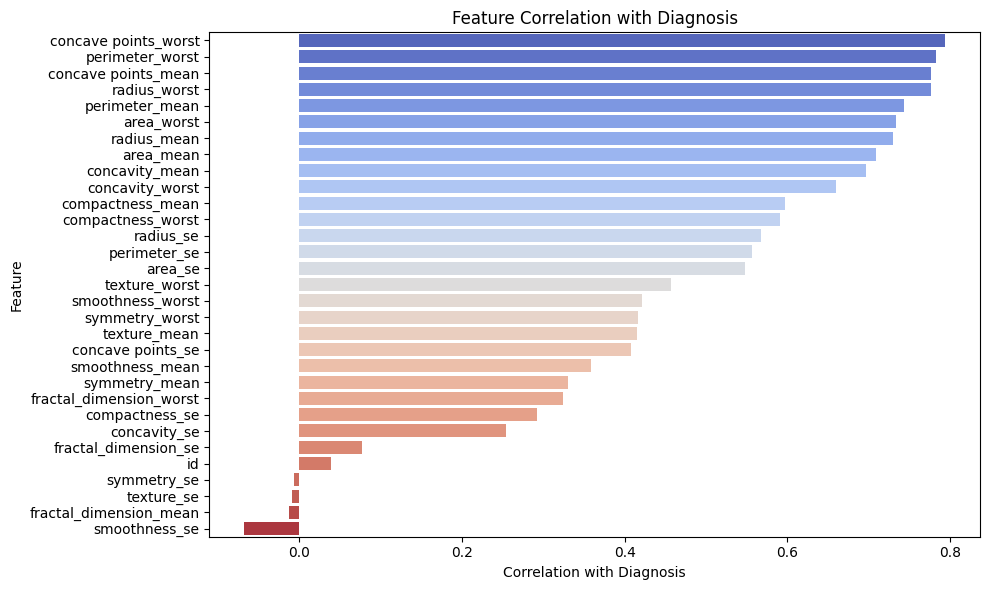

In [99]:

# Calculate correlation matrix
correlation_matrix = df.corr()

# Get correlation with 'diagnosis' only
correlation_with_diagnosis = correlation_matrix['diagnosis'].drop('diagnosis').sort_values(ascending=False)

# Create a DataFrame for clean plotting
corr_df = correlation_with_diagnosis.reset_index()
corr_df.columns = ['feature', 'correlation']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_df, x='correlation', y='feature', palette='coolwarm')
plt.xlabel("Correlation with Diagnosis")
plt.ylabel("Feature")
plt.title("Feature Correlation with Diagnosis")
plt.tight_layout()
plt.show()

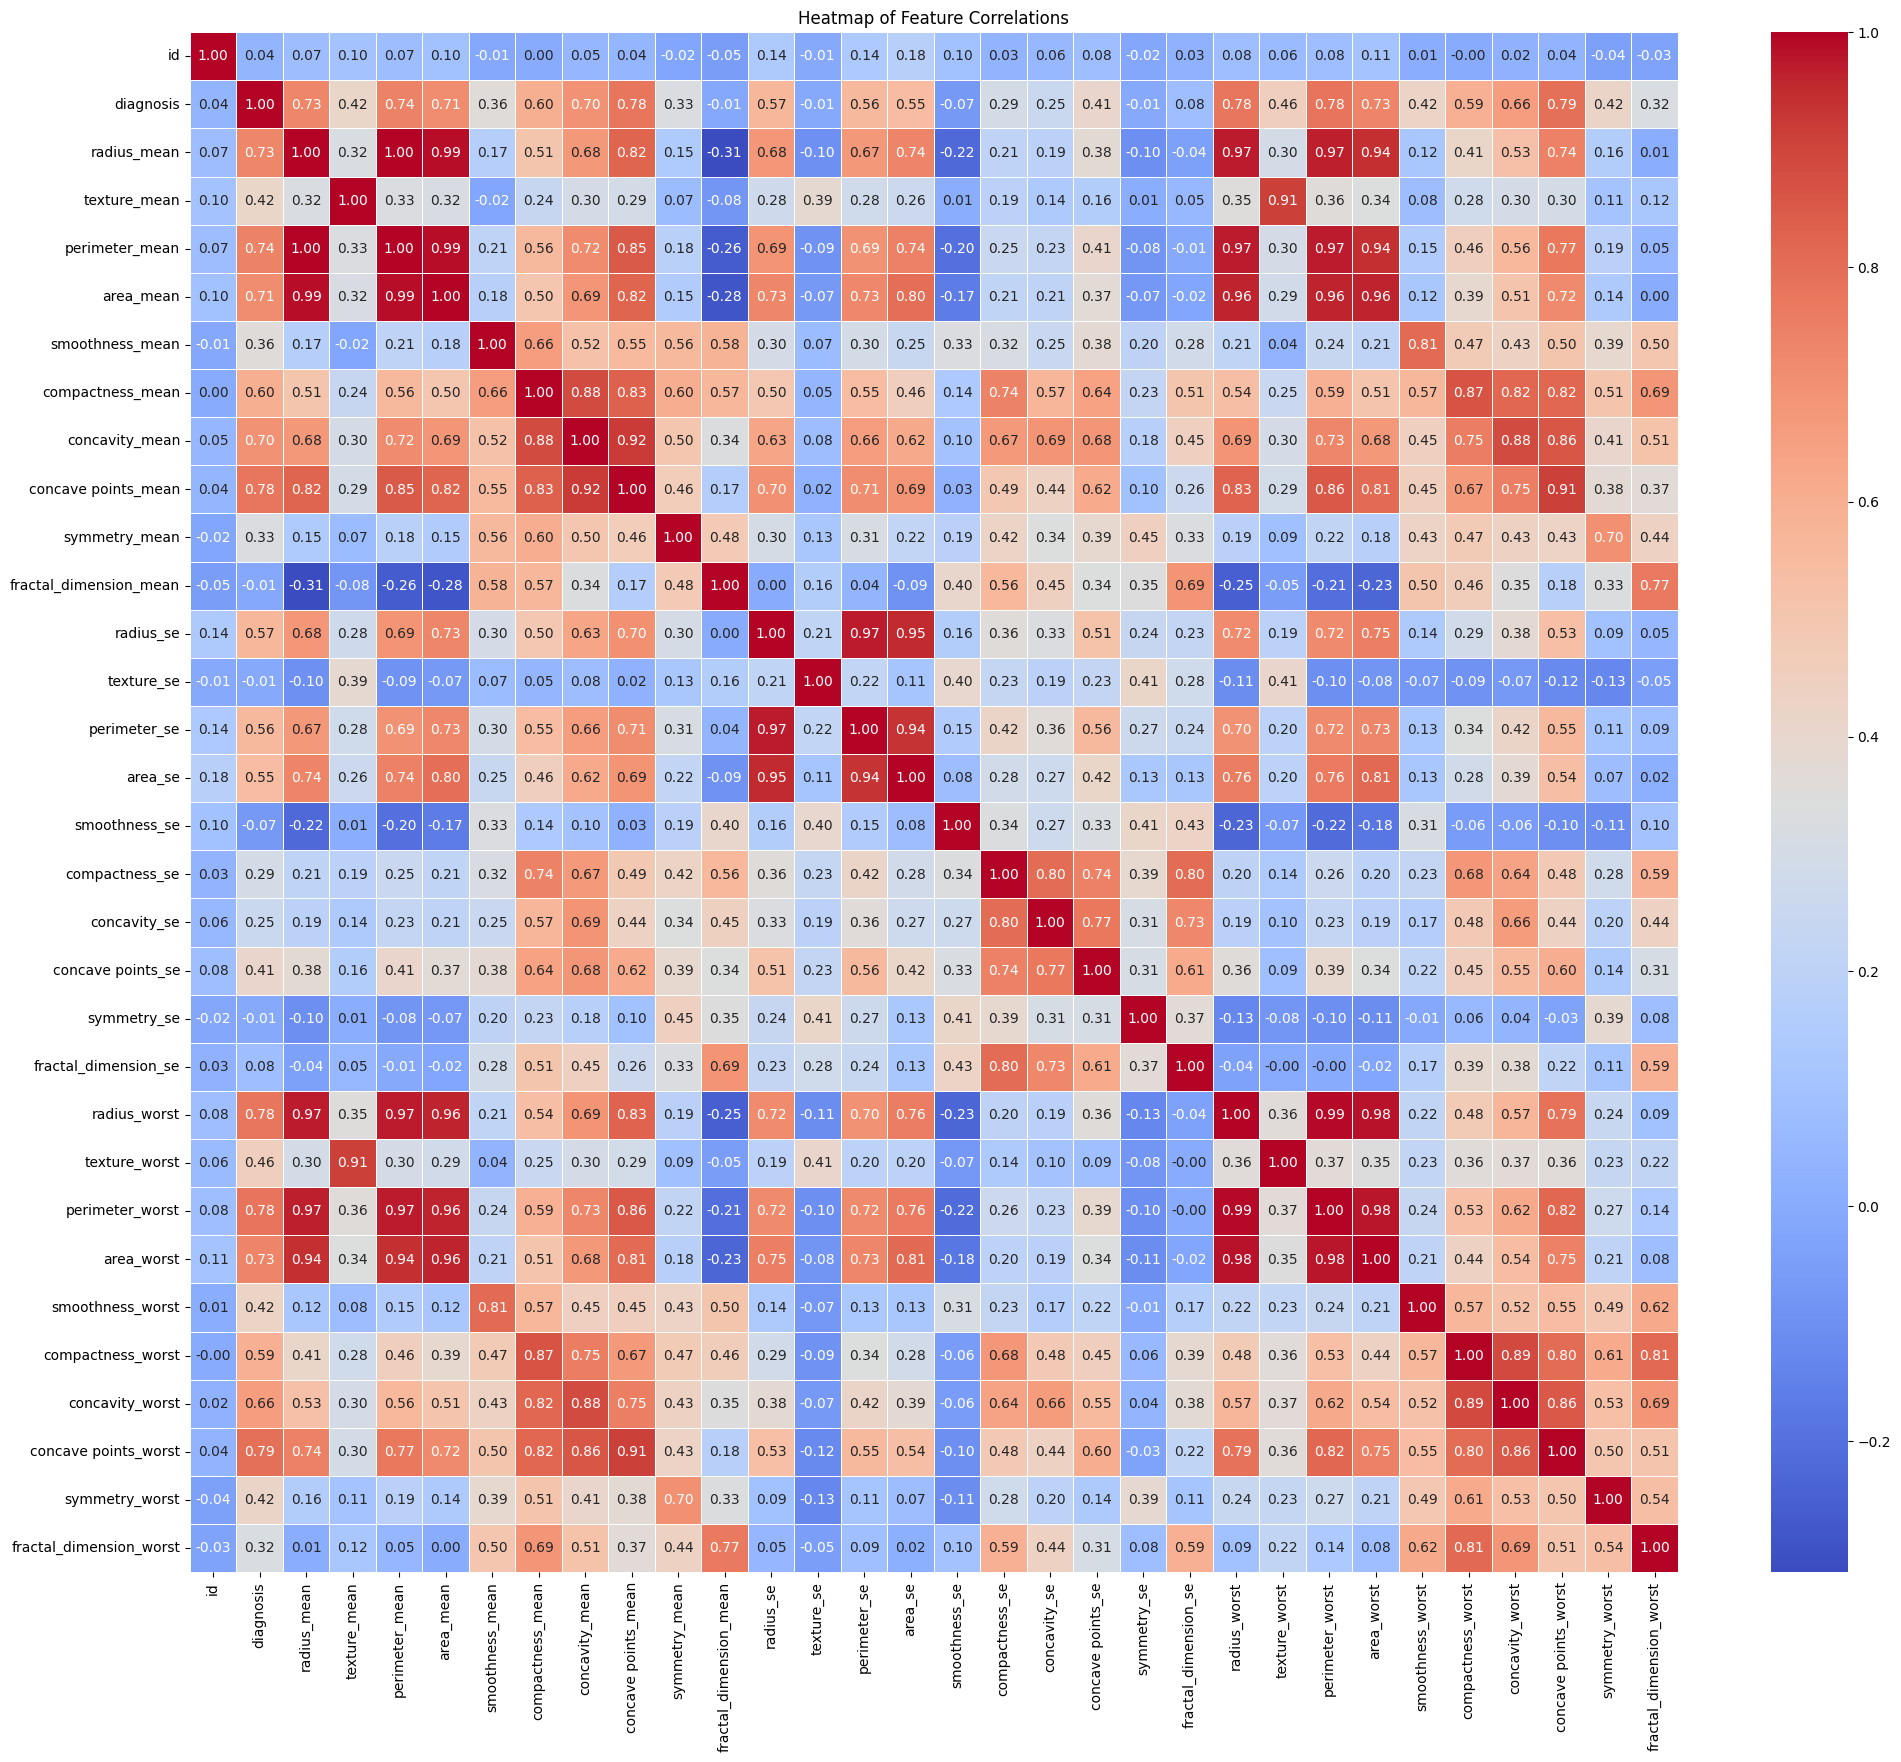

In [100]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

In [101]:
# Top 10 only
corr_df = corr_df.iloc[:10]
corr_df

,feature,correlation
0,concave points_worst,0.793566
1,perimeter_worst,0.782914
2,concave points_mean,0.776614
3,radius_worst,0.776454
4,perimeter_mean,0.742636
5,area_worst,0.733825
6,radius_mean,0.730029
7,area_mean,0.708984
8,concavity_mean,0.696360
9,concavity_worst,0.659610


In [102]:
# Select the remaining "mean" columns along with 'diagnosis' if they still exist
mean_cols = [col for col in df.columns if '_mean' in col]
cols = ['diagnosis'] + mean_cols

# Create the scatter plot matrix
sns.pairplot(data=df[cols], hue='diagnosis', palette='rocket')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

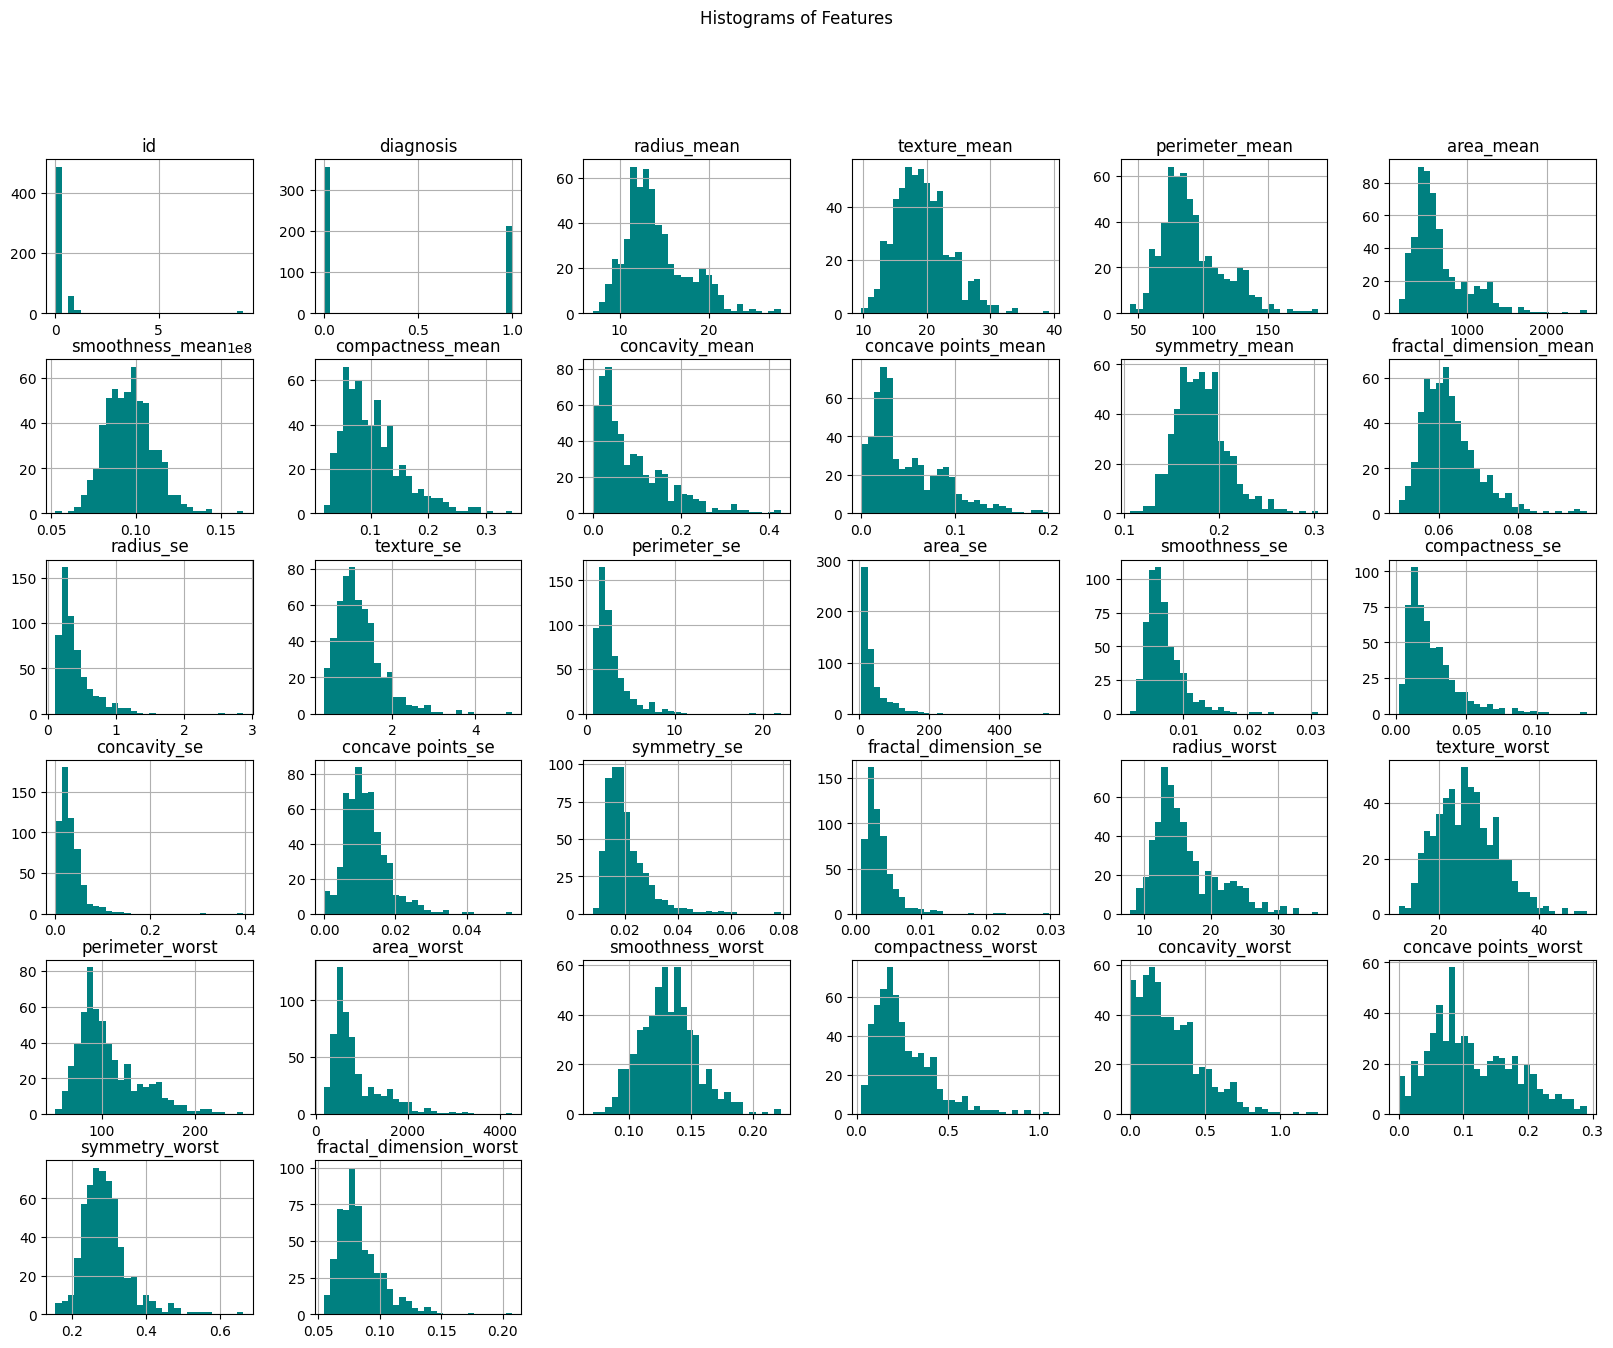

In [103]:
# 3. Histograms for each feature
df.hist(bins=30, figsize=(20, 15), color='teal')
plt.suptitle('Histograms of Features')
plt.show()



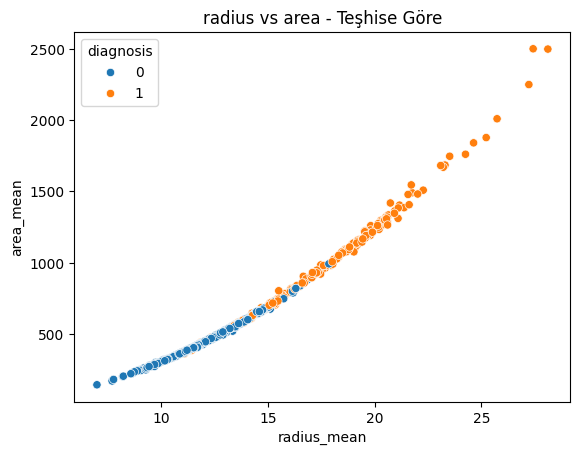

In [104]:
sns.scatterplot(data=df, x='radius_mean', y='area_mean', hue='diagnosis')
plt.title("radius vs area - Teşhise Göre")
plt.show()

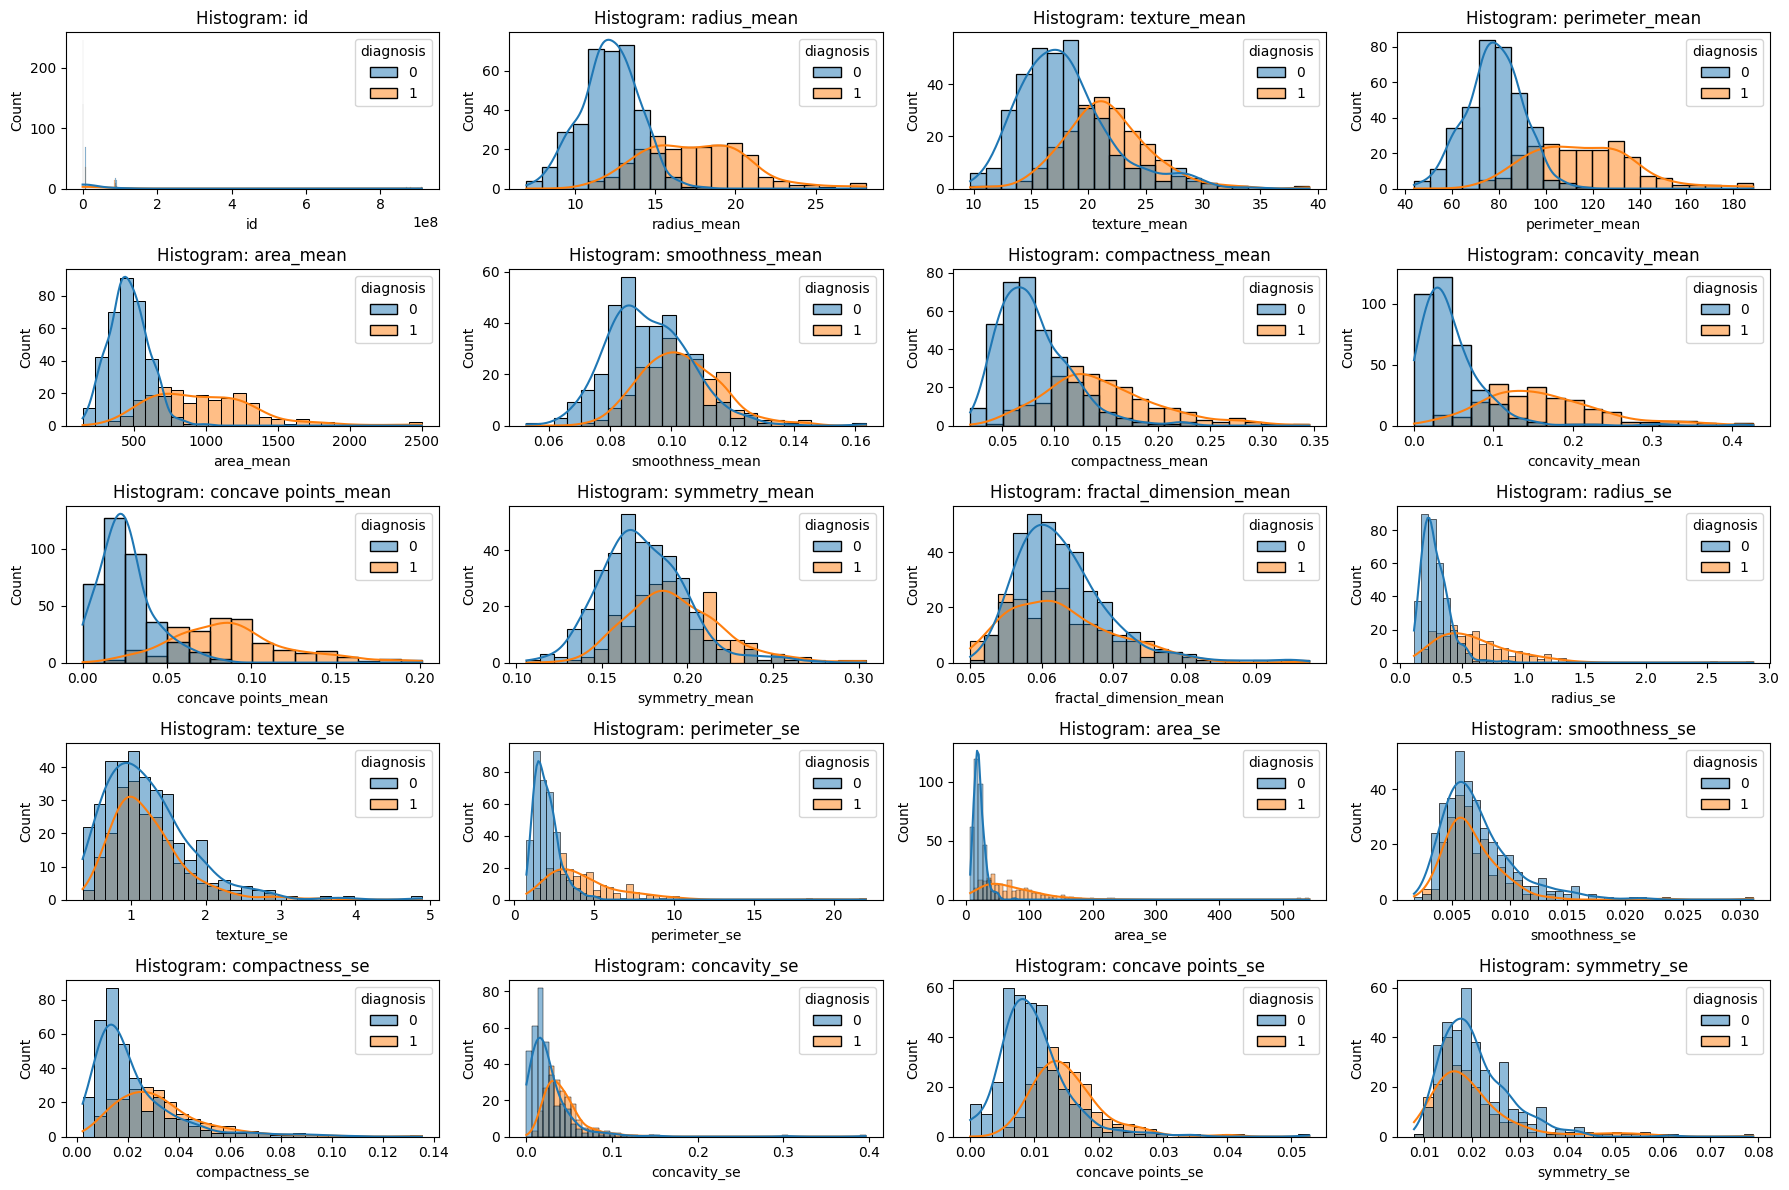

In [105]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_features[:20], 1):
    plt.subplot(5, 4, i)
    sns.histplot(data=df, x=col, hue="diagnosis", kde=True)
    plt.title(f"Histogram: {col}")

plt.tight_layout()
plt.show()

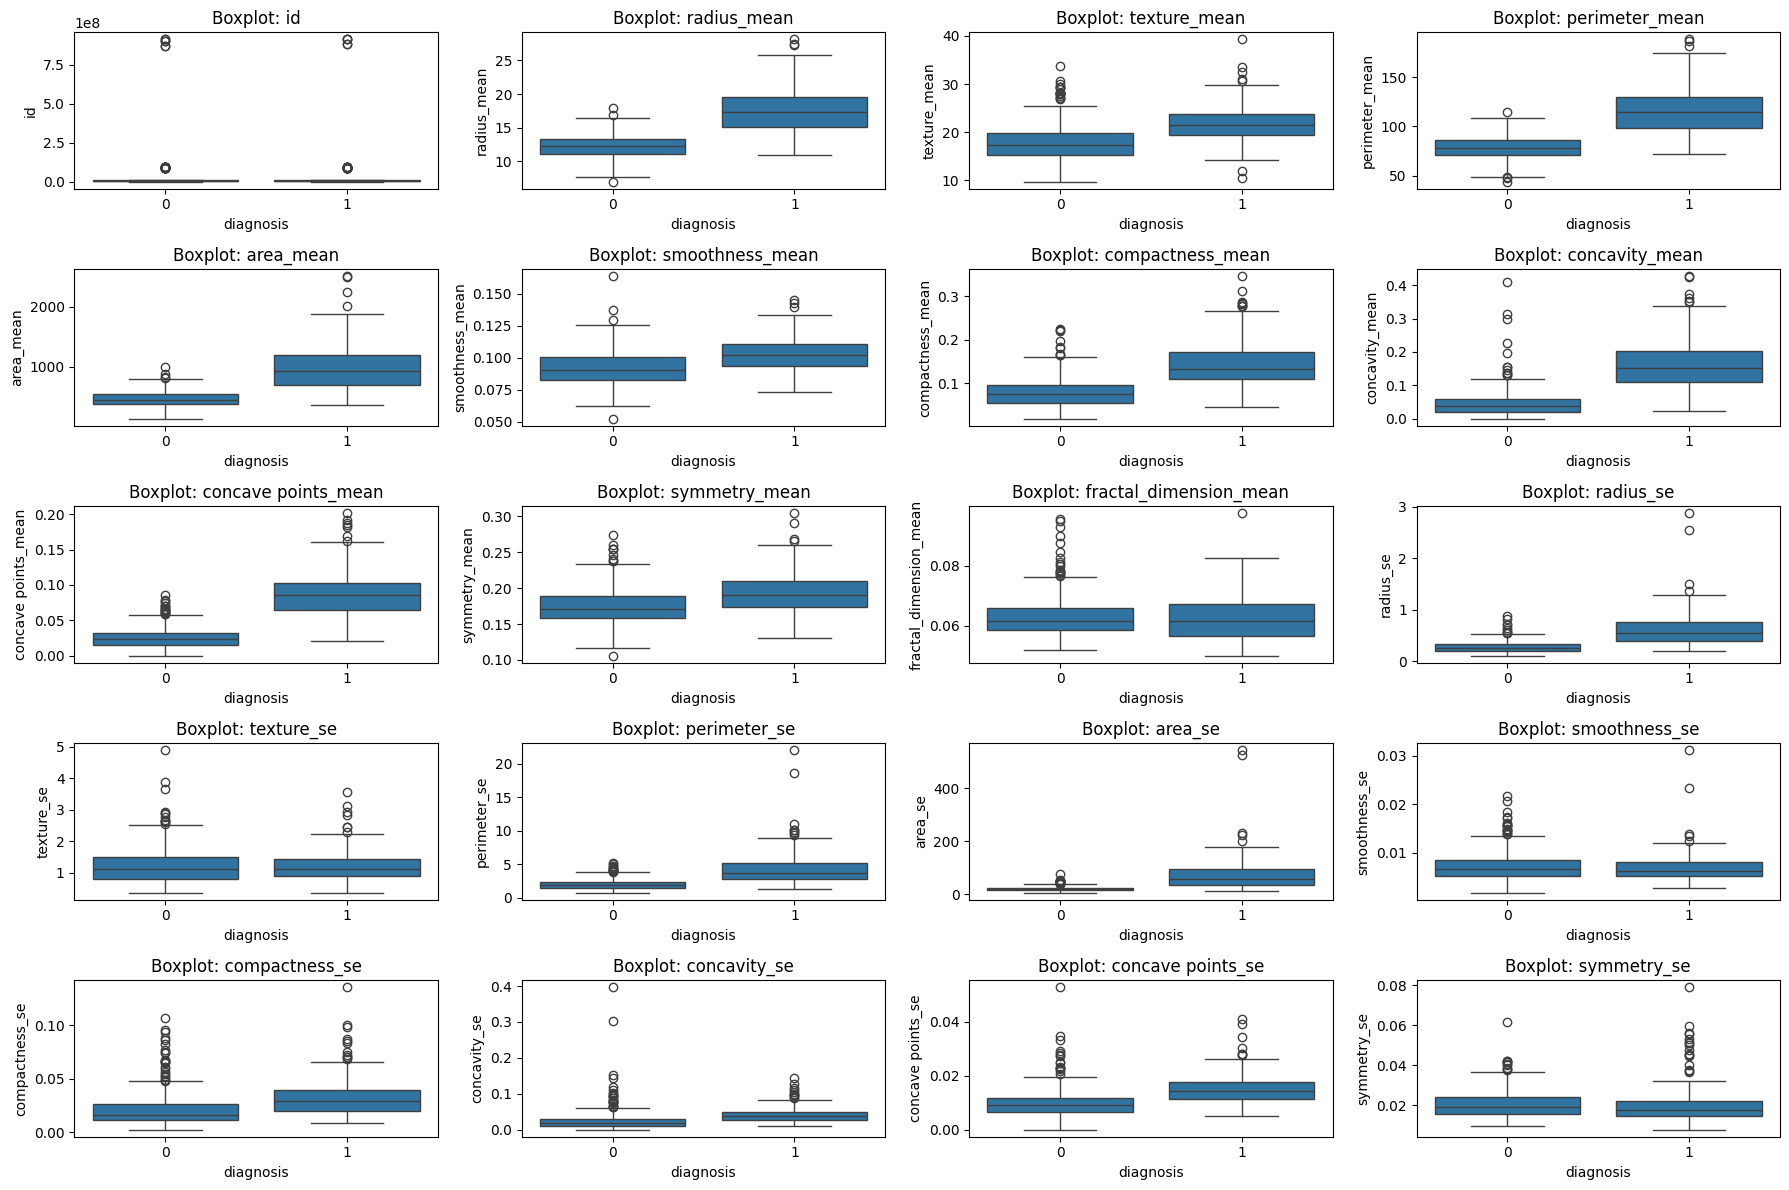

In [106]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_features[:20], 1):  # İlk 6 sütun örnek
    plt.subplot(5, 4, i)
    sns.boxplot(data=df, x="diagnosis", y=col)
    plt.title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()

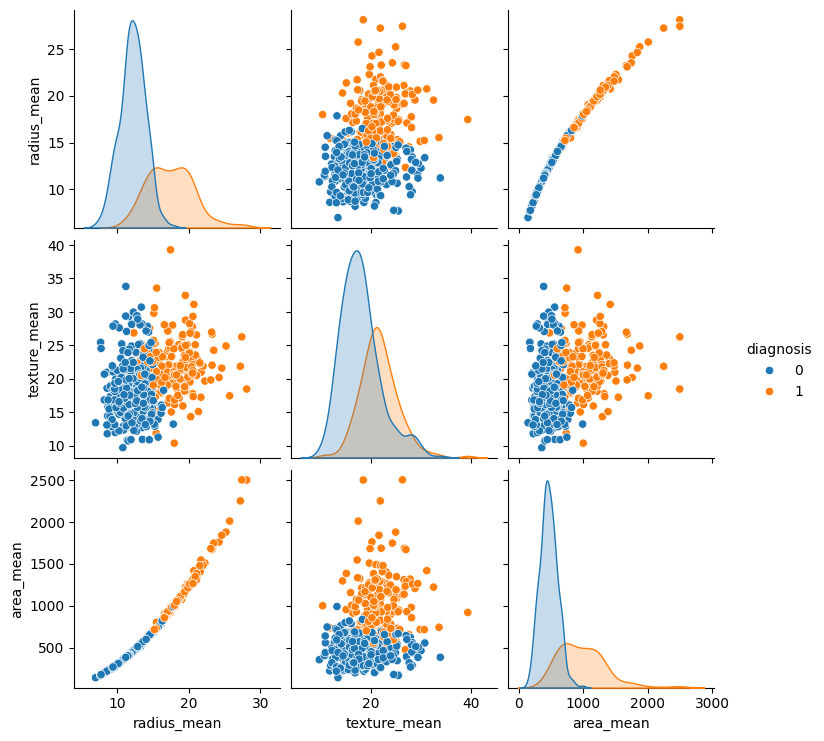

In [107]:
sns.pairplot(df[["radius_mean", "texture_mean", "area_mean", "diagnosis"]], hue="diagnosis")
plt.show()

# 🧹 5. Data Processing and Cleaning

- 1. check the columns to drop
- 2. check the null values
- 3. check the correlation


###  check the correlation

In [108]:
# Select only numerical features
numerical_features = df.select_dtypes(include=[np.number])

# Calculate correlations
corr = numerical_features.corr()

# Convert correlation matrix to a readable format
corr_pairs = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))  # Take only upper triangle without diagonal
corr_pairs = corr_pairs.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Sort by absolute correlation value, highest to lowest
corr_pairs['AbsCorrelation'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.sort_values(by='AbsCorrelation', ascending=False)

# Display the top 40 strongest correlations
print(corr_pairs.head(40))


               Feature 1                Feature 2  Correlation  AbsCorrelation
62           radius_mean           perimeter_mean     0.997855        0.997855
452         radius_worst          perimeter_worst     0.993708        0.993708
63           radius_mean                area_mean     0.987357        0.987357
118       perimeter_mean                area_mean     0.986507        0.986507
453         radius_worst               area_worst     0.984015        0.984015
468      perimeter_worst               area_worst     0.977578        0.977578
307            radius_se             perimeter_se     0.972794        0.972794
137       perimeter_mean          perimeter_worst     0.970387        0.970387
80           radius_mean             radius_worst     0.969539        0.969539
135       perimeter_mean             radius_worst     0.969476        0.969476
82           radius_mean          perimeter_worst     0.965137        0.965137
161            area_mean             radius_worst   

### droping the not needed features

In [109]:
features_to_drop = [
    'perimeter_mean',
    'perimeter_worst',
    'area_mean',
    'area_worst',
    'perimeter_se',
    'radius_worst',
    'area_se',
    'concave points_worst',  # keep mean, drop worst
    'compactness_worst',
    'concavity_worst',
    'compactness_mean',
    'id',
    'symmetry_worst',
    'texture_se'
]

In [110]:
df.drop(columns=features_to_drop, inplace=True)
df

,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.30010,0.14710,0.2419,0.07871,1.0950,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,0.16220,0.11890
1,1,20.57,17.77,0.08474,0.08690,0.07017,0.1812,0.05667,0.5435,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,0.12380,0.08902
2,1,19.69,21.25,0.10960,0.19740,0.12790,0.2069,0.05999,0.7456,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,0.14440,0.08758
3,1,11.42,20.38,0.14250,0.24140,0.10520,0.2597,0.09744,0.4956,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,0.20980,0.17300
4,1,20.29,14.34,0.10030,0.19800,0.10430,0.1809,0.05883,0.7572,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,0.13740,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.24390,0.13890,0.1726,0.05623,1.1760,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,26.40,0.14100,0.07115
565,1,20.13,28.25,0.09780,0.14400,0.09791,0.1752,0.05533,0.7655,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,38.25,0.11660,0.06637
566,1,16.60,28.08,0.08455,0.09251,0.05302,0.1590,0.05648,0.4564,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,34.12,0.11390,0.07820
567,1,20.60,29.33,0.11780,0.35140,0.15200,0.2397,0.07016,0.7260,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,39.42,0.16500,0.12400


## spliting and *normalization of data*

In [111]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']


In [112]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
X

,radius_mean,texture_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.568466,2.652874,2.532475,2.217515,2.255747,2.489734,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,-1.359293,1.307686,1.937015
1,1.829821,-0.353632,-0.826962,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.369203,-0.375612,0.281190
2,1.579888,0.456187,0.942210,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,-0.023974,0.527407,0.201391
3,-0.768909,0.253732,3.283553,1.915897,1.451707,2.867383,4.910919,0.326373,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,0.133984,3.394275,4.935010
4,1.750297,-1.151816,0.280372,1.371011,1.428493,-0.009560,-0.562450,1.270543,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,-1.466770,0.220556,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,1.041842,1.947285,2.320965,-0.312589,-0.931027,2.782080,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,0.117700,0.378365,-0.709091
565,1.704854,2.085134,0.102458,0.693043,1.263669,-0.217664,-1.058611,1.300499,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,2.047399,-0.691230,-0.973978
566,0.702284,2.045574,-0.840484,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,1.374854,-0.809587,-0.318409
567,1.838341,2.336457,1.525767,3.296944,2.658866,2.137194,1.043695,1.157935,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,2.237926,1.430427,2.219635


### Split the data into training and testing sets

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 🔧 6. Models Building and Training

## Neural Network

In [114]:
# 4-layer NN architecture
nn_model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # No regularization on output
])

# Compile model
nn_model.compile(optimizer=Adam(learning_rate=0.01) , loss='binary_crossentropy', metrics=['accuracy'])

# Add EarlyStopping
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Train model
nn_model.fit(X_train, y_train, epochs=100, batch_size=32,
          validation_split=0.2, callbacks=[early_stop])


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7723 - loss: 0.9152 - val_accuracy: 0.9121 - val_loss: 0.5745
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9466 - loss: 0.5273 - val_accuracy: 0.9341 - val_loss: 0.4514
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9607 - loss: 0.3760 - val_accuracy: 0.9341 - val_loss: 0.3759
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9728 - loss: 0.3198 - val_accuracy: 0.9341 - val_loss: 0.3140
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9779 - loss: 0.2674 - val_accuracy: 0.9451 - val_loss: 0.2741
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9814 - loss: 0.2267 - val_accuracy: 0.9560 - val_loss: 0.2329
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9767 - loss: 0.1894 - val_accuracy: 0.9780 - val_loss: 0.2129
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9743 - loss: 0.1745 - val_accuracy: 0.9560 - val_loss

In [124]:
nn_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 32)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,365 (13.15 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,244 (8.77 KB)

<div style="text-align: center;">
  <img src="nn (3).svg" alt="Neural Network Diagram" style="width:100%;">
</div>


## Models optimzied
- ✅ Logistic Regression
- ✅ Decision Tree
- ✅ Random Forest
- ✅ XGBoost
- ✅ Neural Network
- ✅ Support Vector Machine (SVM)
- ✅ K-Nearest Neighbors (KNN)
- ✅ Naive Bayes

In [115]:
# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear', C=1.0),

    "Decision Tree": DecisionTreeClassifier(
        max_depth=5, min_samples_split=4, min_samples_leaf=2, random_state=42
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=6, min_samples_split=4, min_samples_leaf=2, random_state=42
    ),

    "XGBoost": XGBClassifier(
        use_label_encoder=False, eval_metric='logloss',
        learning_rate=0.1, n_estimators=200, max_depth=4,
        subsample=0.8, colsample_bytree=0.8, random_state=42
    ),

    "Support Vector Machine": SVC(
        C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=42
    ),

    "K-Nearest Neighbors": KNeighborsClassifier(
        n_neighbors=5, weights='distance'
    ),

    "Naive Bayes": GaussianNB(),

}


### models trainging

In [116]:
trained_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"Finished training {name}.\n")

Training Logistic Regression...
Finished training Logistic Regression.

Training Decision Tree...
Finished training Decision Tree.

Training Random Forest...
Finished training Random Forest.

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:17:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Finished training XGBoost.

Training Support Vector Machine...
Finished training Support Vector Machine.

Training K-Nearest Neighbors...
Finished training K-Nearest Neighbors.

Training Naive Bayes...
Finished training Naive Bayes.



### evaluting models

Accuracy of Logistic Regression: 97.3684%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



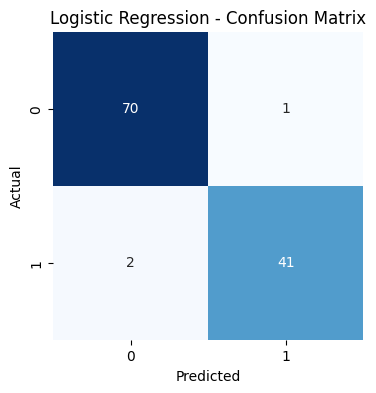

Accuracy of Decision Tree: 95.6140%
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



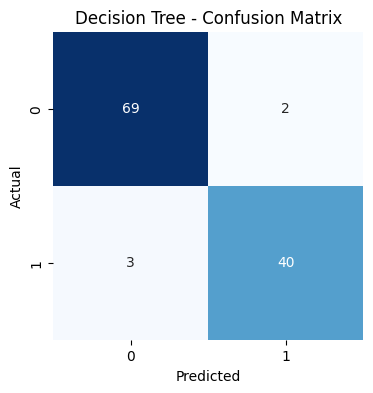

Accuracy of Random Forest: 95.6140%
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



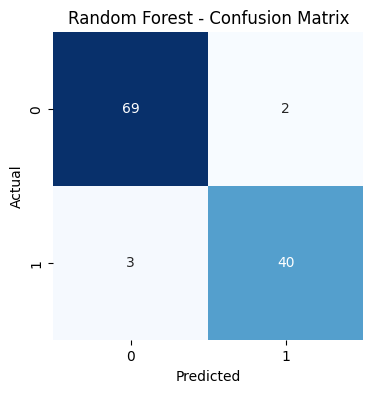

Accuracy of XGBoost: 95.6140%
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



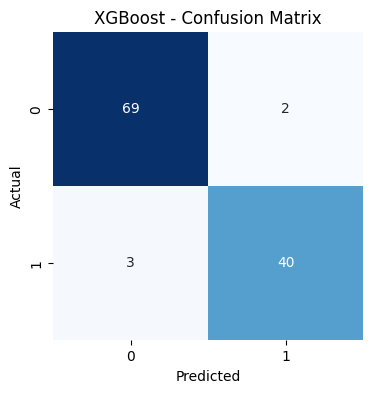

Accuracy of Support Vector Machine: 98.2456%
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



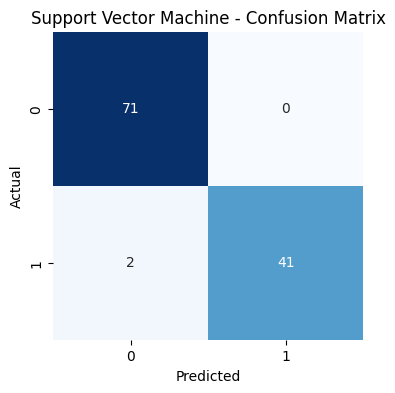

Accuracy of K-Nearest Neighbors: 96.4912%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



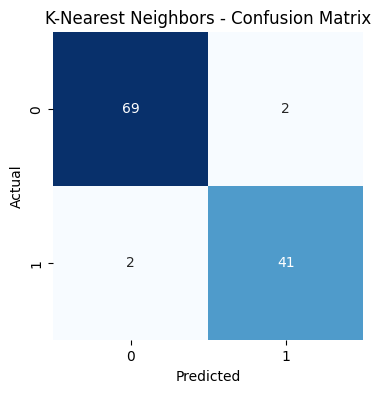

Accuracy of Naive Bayes: 93.8596%
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



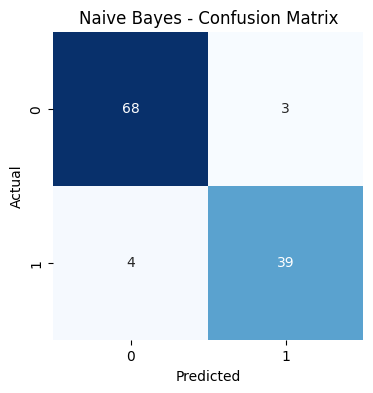

In [121]:
def plot_confusion(cm, title):
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy * 100:.4f}%")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion(cm, f"{name} - Confusion Matrix")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Accuracy of Neural Network: 98.2456%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



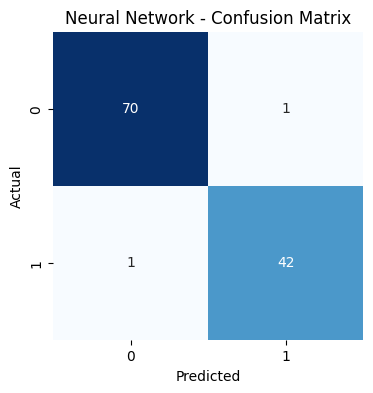

In [123]:
y_pred_prob = nn_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Neural Network: {accuracy * 100:.4f}%")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion(cm, f"Neural Network - Confusion Matrix")